## **TAREA 4: Análisis de Estimaciones de Pobreza Comunal en Chile - 2022**

**Autores:** Simón Ramirez - Victor Saldivia - Carlos Saquel  
**Asignatura:** Visualización de la Información

Este análisis tiene como objetivo explorar las estimaciones de pobreza por ingresos y pobreza multidimensional en las comunas de Chile durante el año 2022. Los datos fueron obtenidos a partir de los conjuntos de datos proporcionados por el Ministerio de Desarrollo Social y Familia de Chile a través del Ministerio de Desarrollo Social y Familia. Se presenta un análisis descriptivo y visualizaciones para comprender de mejor forma las correlaciones y características de la pobreza en las comunas del país.

### **IMPORTACIÓN DE LIBRERÍAS**

In [23]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
pd.option_context('mode.use_inf_as_na', True)

### **CARGA DEL DATASET**
El archivo que vamos a utilizar contiene información sobre las estimaciones de pobreza en Chile para el año 2022, tanto de ingresos como multidimensional. 


In [24]:
file_path_1 = './data/Estimaciones_Indice_Pobreza_Multidimensional_Comunas_2022.xlsx'
file_path_2 = './data/Estimaciones_Tasa_Pobreza_Ingresos_Comunas_2022.xlsx'

In [25]:
# Leer ambos archivos
df_pobreza_ingresos = pd.read_excel(file_path_1)
df_pobreza_multidimensional = pd.read_excel(file_path_2)

### **FUNCIONES DE LIMPIEZA DE LOS DATOS**


In [26]:
# Funciones de limpieza de columnas y acentos
def accent_replace(col):
    reemplazos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
    }
    for acento, sin_acento in reemplazos.items():
        col = col.replace(acento, sin_acento)
    return col

def columns_clean(columnas):
    columnas_limpias = []
    for col in columnas:
        col = accent_replace(col).lower().replace('\n', '')
        col = re.sub(r'\(.*?\)', '', col).replace('*', '').replace(' ', '_')
        col = re.sub(r'[^a-z0-9_]', '', col).rstrip('_')
        columnas_limpias.append(col)
    return columnas_limpias

def get_clean_data(file, get_rows):
    df = pd.read_excel(file, skiprows=get_rows[0])
    df = df.iloc[:get_rows[1]]
    df.columns = columns_clean(df.columns)
    return df

 #### **LIMPIEZA, CARGA Y AJUSTES DE COLUMNAS DEL DATASET DE POBREZA POR INGRESOS**

In [27]:
df_1 = get_clean_data(file='./data/Estimaciones_Tasa_Pobreza_Ingresos_Comunas_2022.xlsx', get_rows=[2, 345])
df_1.columns = ['codigo', 'region', 'comuna', 'poblacion', 'personas_pobreza_por_ingresos', 'porcentaje_pobreza_por_ingresos_2022',
                'limite_inferior_ingreso', 'limite_superior_ingreso', 'presencia_comuna_casen', 'tipo_de_estimacion_sae']
df_1.head()

codigo    region         comuna  poblacion  personas_pobreza_por_ingresos  \
0   1101  Tarapacá        Iquique   229674.0                        18122.0   
1   1107  Tarapacá  Alto Hospicio   138527.0                        21144.0   
2   1401  Tarapacá   Pozo Almonte    18290.0                         2805.0   
3   1402  Tarapacá         Camiña     1380.0                          332.0   
4   1403  Tarapacá       Colchane     1575.0                          350.0   

   porcentaje_pobreza_por_ingresos_2022  limite_inferior_ingreso  \
0                              0.078904                 0.064903   
1                              0.152634                 0.137397   
2                              0.153344                 0.115596   
3                              0.240365                 0.161336   
4                              0.222535                 0.147399   

   limite_superior_ingreso presencia_comuna_casen  \
0                 0.092905                     Sí   
1                 0.167872                     Sí   
2                 0.191092                     Sí   
3                 0.319394                     Sí   
4                 0.297672                     Sí   

              tipo_de_estimacion_sae  
0  Directa y Sintética (Fay-Herriot)  
1  Directa y Sintética (Fay-Herriot)  
2  Directa y Sintética (Fay-Herriot)  
3                          Sintética  
4                          Sintética

### **ANÁLISIS DESCRIPTIVO DE LOS DATOS**

In [28]:
df_1.describe(include='all')

codigo         region   comuna      poblacion  \
count    345.0            345      345     345.000000   
unique   345.0             16      345            NaN   
top     1101.0  Metropolitana  Iquique            NaN   
freq       1.0             52        1            NaN   
mean       NaN            NaN      NaN   57618.115942   
std        NaN            NaN      NaN   91321.953828   
min        NaN            NaN      NaN     207.000000   
25%        NaN            NaN      NaN    9959.000000   
50%        NaN            NaN      NaN   20525.000000   
75%        NaN            NaN      NaN   56542.000000   
max        NaN            NaN      NaN  661900.000000   

        personas_pobreza_por_ingresos  porcentaje_pobreza_por_ingresos_2022  \
count                      345.000000                            345.000000   
unique                            NaN                                   NaN   
top                               NaN                                   NaN   
freq                              NaN                                   NaN   
mean                      3748.527536                              0.090339   
std                       5168.776092                              0.043544   
min                          6.000000                              0.008747   
25%                        985.000000                              0.059865   
50%                       1863.000000                              0.085873   
75%                       3888.000000                              0.115698   
max                      33344.000000                              0.242779   

        limite_inferior_ingreso  limite_superior_ingreso  \
count                345.000000               345.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                   0.051886                 0.129155   
std                    0.034849                 0.054402   
min                    0.000000                 0.021982   
25%                    0.026897                 0.092199   
50%                    0.047585                 0.123562   
75%                    0.070589                 0.163677   
max                    0.191087                 0.319394   

       presencia_comuna_casen             tipo_de_estimacion_sae  
count                     345                                345  
unique                      2                                  2  
top                        Sí  Directa y Sintética (Fay-Herriot)  
freq                      335                                246  
mean                      NaN                                NaN  
std                       NaN                                NaN  
min                       NaN                                NaN  
25%                       NaN                                NaN  
50%                       NaN                                NaN  
75%                       NaN                                NaN  
max                       NaN                                NaN

#### Información General del Dataset


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo                                345 non-null    object 
 1   region                                345 non-null    object 
 2   comuna                                345 non-null    object 
 3   poblacion                             345 non-null    float64
 4   personas_pobreza_por_ingresos         345 non-null    float64
 5   porcentaje_pobreza_por_ingresos_2022  345 non-null    float64
 6   limite_inferior_ingreso               345 non-null    float64
 7   limite_superior_ingreso               345 non-null    float64
 8   presencia_comuna_casen                345 non-null    object 
 9   tipo_de_estimacion_sae                345 non-null    object 
dtypes: float64(5), object(5)
memory usage: 27.1+ KB


 #### **LIMPIEZA, CARGA Y AJUSTES DE COLUMNAS DEL DATASET DE POBREZA MULTIDIMENSIONAL**

In [30]:
df_2 = get_clean_data(file='./data/Estimaciones_Indice_Pobreza_Multidimensional_Comunas_2022.xlsx', get_rows=[2, 345])
df_2.columns = ['codigo', 'region', 'comuna', 'poblacion', 'personas_pobreza_multidimensional', 'porcentaje_pobreza_multidimensional_2022',
                'limite_inferior_multidimensional', 'limite_superior_multidimensional', 'presencia_comuna_casen', 'tipo_de_estimacion_sae']
df_2.head(10)

codigo       region         comuna  poblacion  \
0   1101     Tarapacá        Iquique   229674.0   
1   1107     Tarapacá  Alto Hospicio   138527.0   
2   1401     Tarapacá   Pozo Almonte    18290.0   
3   1402     Tarapacá         Camiña     1380.0   
4   1403     Tarapacá       Colchane     1575.0   
5   1404     Tarapacá          Huara     3072.0   
6   1405     Tarapacá           Pica     6184.0   
7   2101  Antofagasta    Antofagasta   438942.0   
8   2102  Antofagasta     Mejillones    15502.0   
9   2103  Antofagasta   Sierra Gorda     1790.0   

   personas_pobreza_multidimensional  \
0                       41966.566241   
1                       45162.442981   
2                        4563.395313   
3                         307.626999   
4                         472.752772   
5                        1184.719019   
6                        1040.267243   
7                       73102.886971   
8                        3077.761164   
9                         294.946135   

   porcentaje_pobreza_multidimensional_2022  limite_inferior_multidimensional  \
0                                  0.182722                          0.162429   
1                                  0.326019                          0.294776   
2                                  0.249502                          0.199334   
3                                  0.222918                          0.137766   
4                                  0.300160                          0.187495   
5                                  0.385651                          0.318693   
6                                  0.168219                          0.119494   
7                                  0.166543                          0.140852   
8                                  0.198540                          0.126538   
9                                  0.164774                          0.074272   

   limite_superior_multidimensional presencia_comuna_casen  \
0                          0.203015                     Sí   
1                          0.357263                     Sí   
2                          0.299671                     Sí   
3                          0.308071                     Sí   
4                          0.412826                     Sí   
5                          0.452609                     Sí   
6                          0.216945                     Sí   
7                          0.192234                     Sí   
8                          0.270541                     Sí   
9                          0.255277                     Sí   

              tipo_de_estimacion_sae  
0  Directa y Sintética (Fay-Herriot)  
1  Directa y Sintética (Fay-Herriot)  
2  Directa y Sintética (Fay-Herriot)  
3                          Sintética  
4                          Sintética  
5  Directa y Sintética (Fay-Herriot)  
6  Directa y Sintética (Fay-Herriot)  
7  Directa y Sintética (Fay-Herriot)  
8  Directa y Sintética (Fay-Herriot)  
9                          Sintética

In [31]:
df_2.describe(include='all')

codigo         region   comuna      poblacion  \
count    345.0            345      345     345.000000   
unique   345.0             16      345            NaN   
top     1101.0  Metropolitana  Iquique            NaN   
freq       1.0             52        1            NaN   
mean       NaN            NaN      NaN   57618.115942   
std        NaN            NaN      NaN   91321.953828   
min        NaN            NaN      NaN     207.000000   
25%        NaN            NaN      NaN    9959.000000   
50%        NaN            NaN      NaN   20525.000000   
75%        NaN            NaN      NaN   56542.000000   
max        NaN            NaN      NaN  661900.000000   

        personas_pobreza_multidimensional  \
count                          345.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                          9763.030150   
std                          15099.360264   
min                              0.234564   
25%                           2051.968205   
50%                           4087.274968   
75%                           9050.029870   
max                         125234.776994   

        porcentaje_pobreza_multidimensional_2022  \
count                                 345.000000   
unique                                       NaN   
top                                          NaN   
freq                                         NaN   
mean                                    0.194504   
std                                     0.070852   
min                                     0.001133   
25%                                     0.152218   
50%                                     0.188434   
75%                                     0.228287   
max                                     0.586389   

        limite_inferior_multidimensional  limite_superior_multidimensional  \
count                         345.000000                        345.000000   
unique                               NaN                               NaN   
top                                  NaN                               NaN   
freq                                 NaN                               NaN   
mean                            0.138041                          0.251170   
std                             0.060731                          0.083519   
min                             0.000000                          0.014602   
25%                             0.105272                          0.200601   
50%                             0.130985                          0.244170   
75%                             0.165782                          0.294340   
max                             0.434680                          0.738099   

       presencia_comuna_casen             tipo_de_estimacion_sae  
count                     345                                345  
unique                      2                                  2  
top                        Sí  Directa y Sintética (Fay-Herriot)  
freq                      335                                298  
mean                      NaN                                NaN  
std                       NaN                                NaN  
min                       NaN                                NaN  
25%                       NaN                                NaN  
50%                       NaN                                NaN  
75%                       NaN                                NaN  
max                       NaN                                NaN

#### Información General del Dataset

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   codigo                                    345 non-null    object 
 1   region                                    345 non-null    object 
 2   comuna                                    345 non-null    object 
 3   poblacion                                 345 non-null    float64
 4   personas_pobreza_multidimensional         345 non-null    float64
 5   porcentaje_pobreza_multidimensional_2022  345 non-null    float64
 6   limite_inferior_multidimensional          345 non-null    float64
 7   limite_superior_multidimensional          345 non-null    float64
 8   presencia_comuna_casen                    345 non-null    object 
 9   tipo_de_estimacion_sae                    345 non-null    object 
dtypes: float64(5), object(5)
memory usage:

### **COMBINACIÓN DE DATASETS**

In [33]:
df_merge = df_1.merge(df_2[['codigo', 'porcentaje_pobreza_multidimensional_2022', 'limite_inferior_multidimensional', 'limite_superior_multidimensional']], on='codigo')

df_merge

codigo    region         comuna  poblacion  personas_pobreza_por_ingresos  \
0     1101  Tarapacá        Iquique   229674.0                        18122.0   
1     1107  Tarapacá  Alto Hospicio   138527.0                        21144.0   
2     1401  Tarapacá   Pozo Almonte    18290.0                         2805.0   
3     1402  Tarapacá         Camiña     1380.0                          332.0   
4     1403  Tarapacá       Colchane     1575.0                          350.0   
..     ...       ...            ...        ...                            ...   
340  16301     Ñuble     San Carlos    56782.0                         7775.0   
341  16302     Ñuble       Coihueco    28817.0                         3887.0   
342  16303     Ñuble         Ñiquén    11543.0                         1598.0   
343  16304     Ñuble     San Fabián     4738.0                          709.0   
344  16305     Ñuble    San Nicolás    12365.0                         1333.0   

     porcentaje_pobreza_por_ingresos_2022  limite_inferior_ingreso  \
0                                0.078904                 0.064903   
1                                0.152634                 0.137397   
2                                0.153344                 0.115596   
3                                0.240365                 0.161336   
4                                0.222535                 0.147399   
..                                    ...                      ...   
340                              0.136924                 0.103947   
341                              0.134886                 0.092175   
342                              0.138420                 0.090545   
343                              0.149570                 0.100026   
344                              0.107768                 0.061146   

     limite_superior_ingreso presencia_comuna_casen  \
0                   0.092905                     Sí   
1                   0.167872                     Sí   
2                   0.191092                     Sí   
3                   0.319394                     Sí   
4                   0.297672                     Sí   
..                       ...                    ...   
340                 0.169902                     Sí   
341                 0.177596                     Sí   
342                 0.186295                     Sí   
343                 0.199115                     Sí   
344                 0.154390                     Sí   

                tipo_de_estimacion_sae  \
0    Directa y Sintética (Fay-Herriot)   
1    Directa y Sintética (Fay-Herriot)   
2    Directa y Sintética (Fay-Herriot)   
3                            Sintética   
4                            Sintética   
..                                 ...   
340  Directa y Sintética (Fay-Herriot)   
341  Directa y Sintética (Fay-Herriot)   
342  Directa y Sintética (Fay-Herriot)   
343  Directa y Sintética (Fay-Herriot)   
344  Directa y Sintética (Fay-Herriot)   

     porcentaje_pobreza_multidimensional_2022  \
0                                    0.182722   
1                                    0.326019   
2                                    0.249502   
3                                    0.222918   
4                                    0.300160   
..                                        ...   
340                                  0.150668   
341                                  0.244921   
342                                  0.191601   
343                                  0.150340   
344                                  0.197127   

     limite_inferior_multidimensional  limite_superior_multidimensional  
0                            0.162429                          0.203015  
1                            0.294776                          0.357263  
2                            0.199334                          0.299671  
3                            0.137766                          0.308071  
4                            0.187495                          0.

### **VISUALIZACIÓN DE CORRELACIONES**

<Axes: >

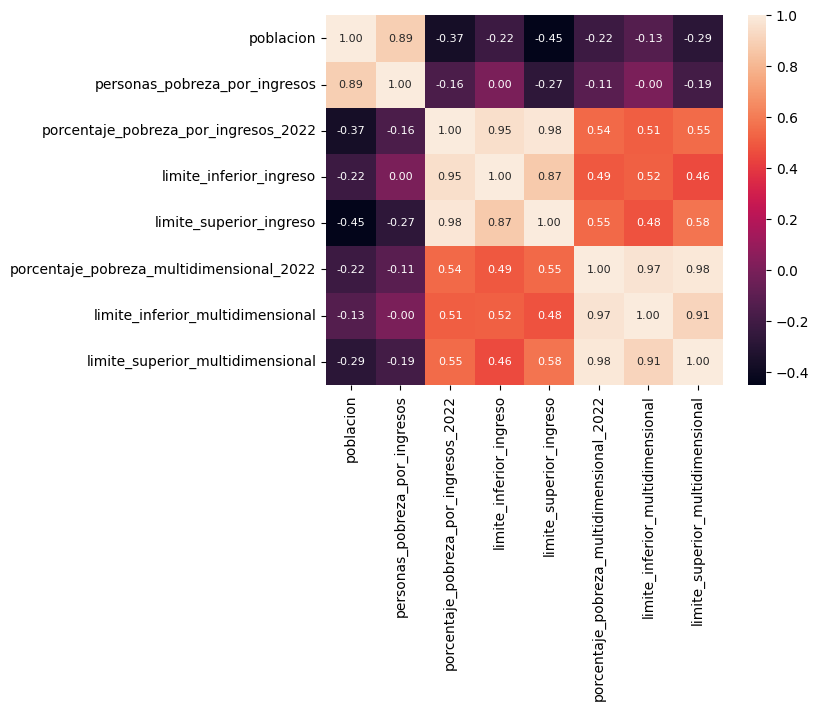

In [34]:
sns.heatmap(df_merge.corr(numeric_only=True), annot=True, fmt=".2f", annot_kws={"size": 8})

#### Visualización de relaciones múltiples: Pairplot por región

<Figure size 1000x1000 with 0 Axes>

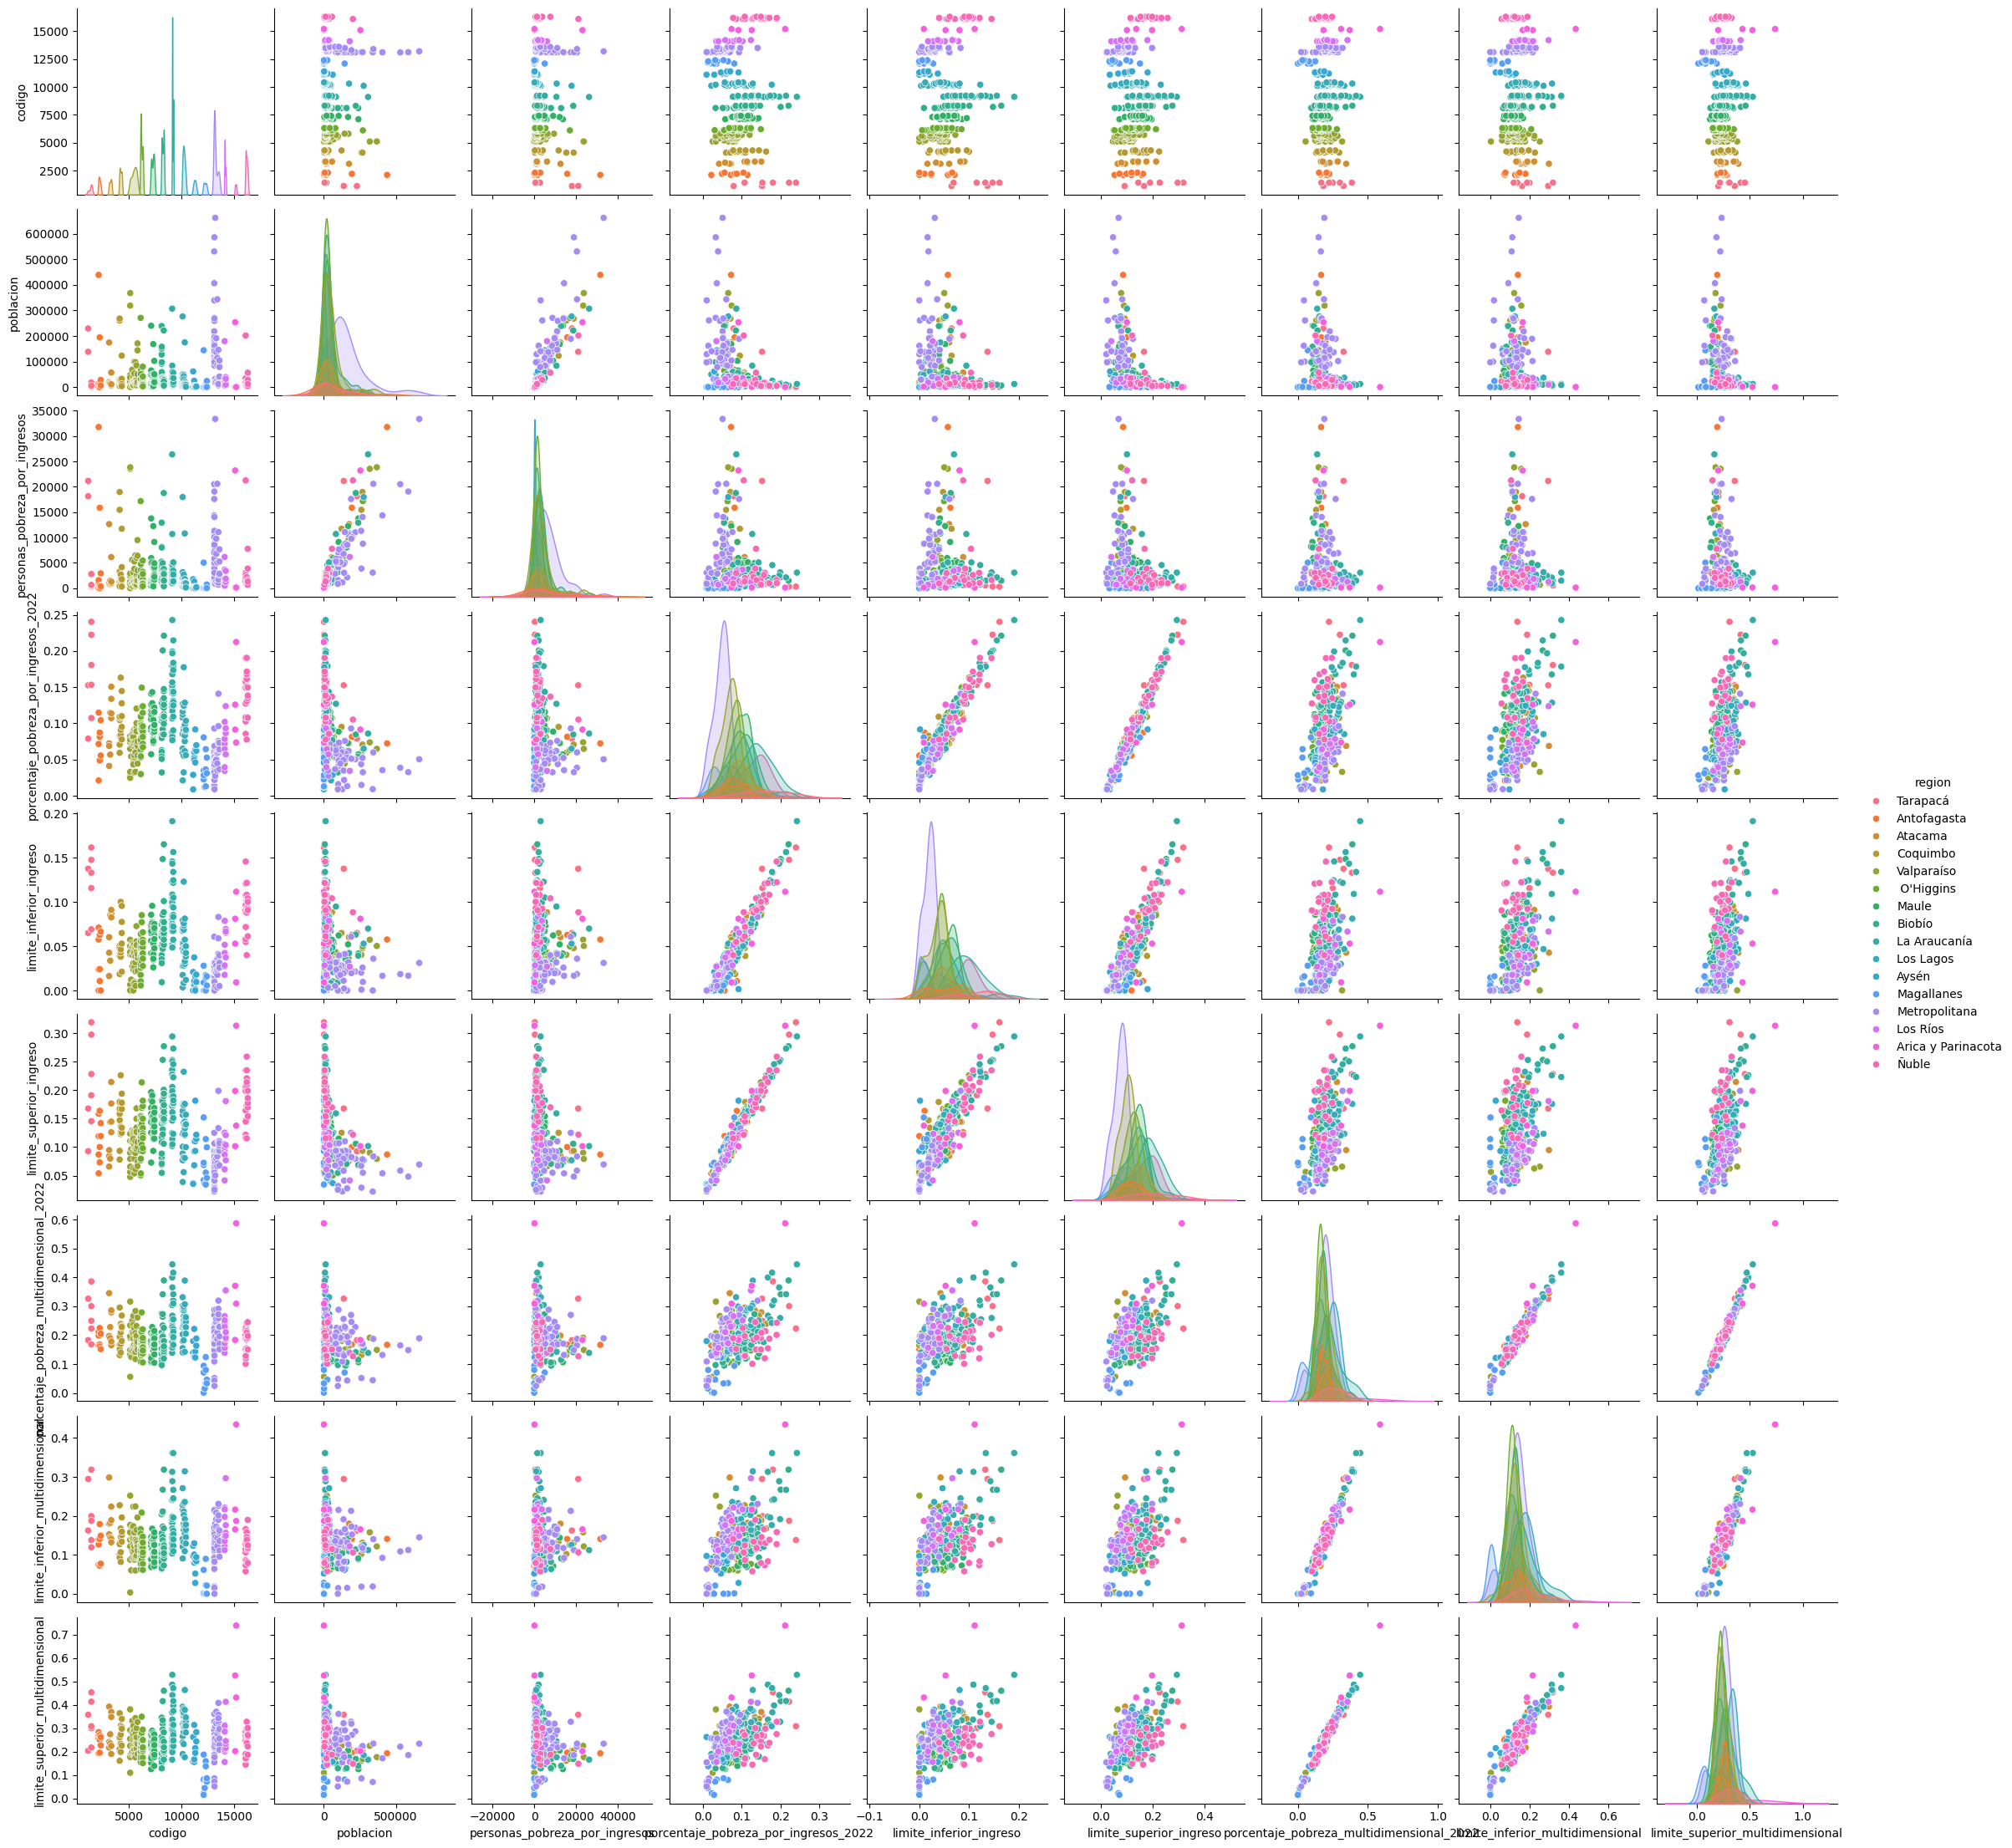

In [35]:
plt.figure(figsize=(10,10))
sns.pairplot(df_merge, hue='region')

#### Scatter Plot de Pobreza por Ingresos vs Pobreza Multidimensional, Segmentado por Región

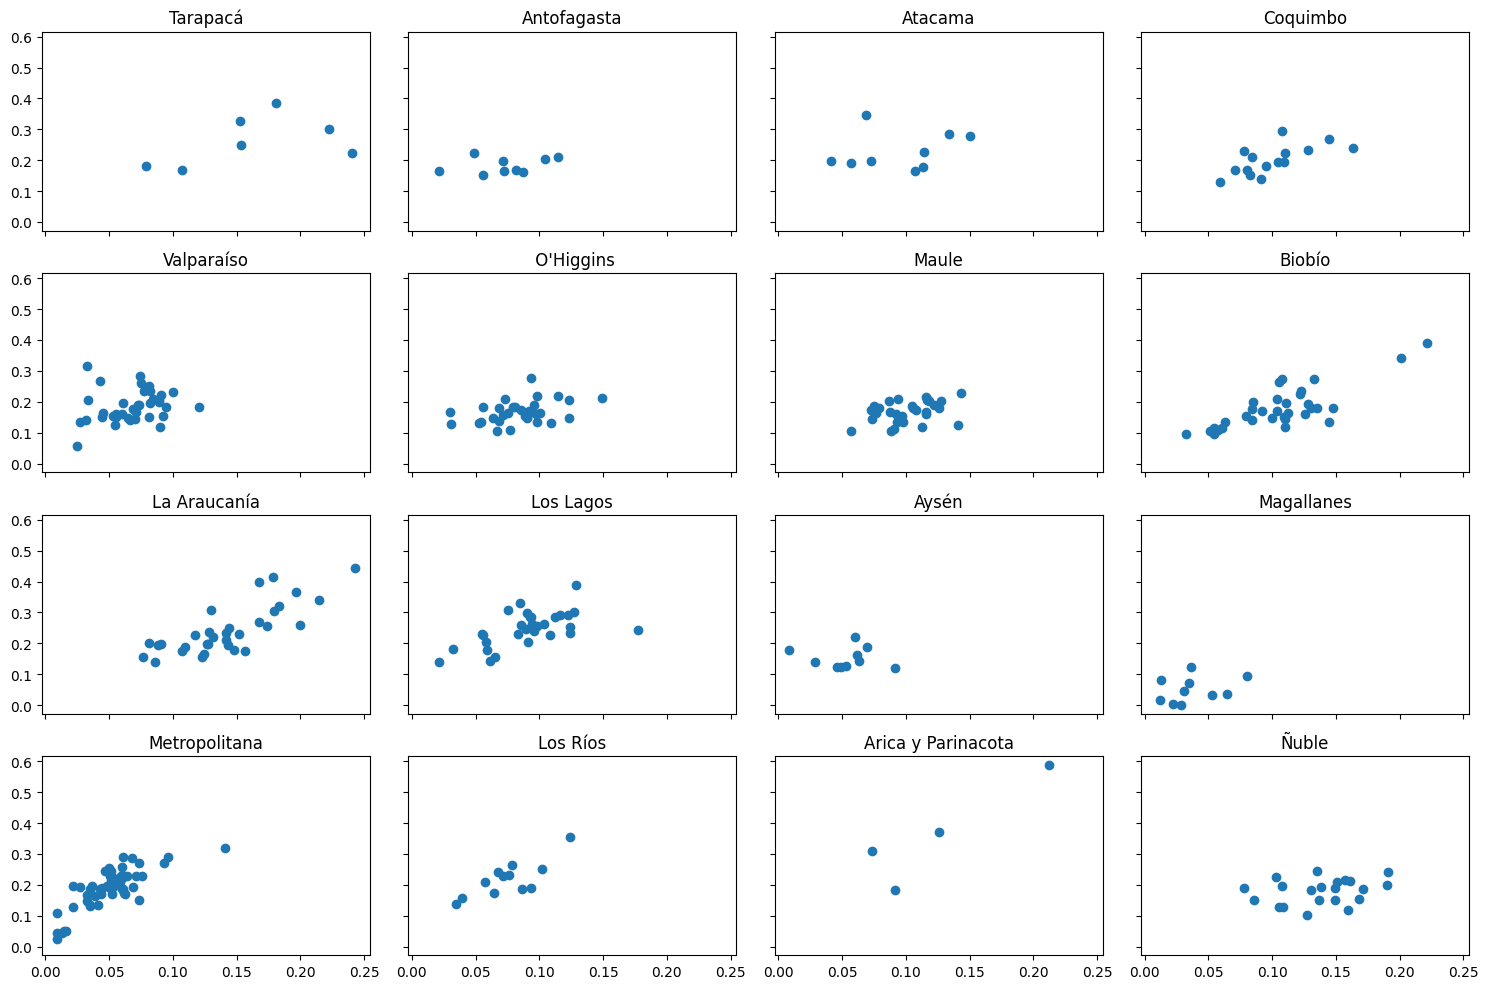

In [36]:
fig, ax = plt.subplots(4,4, figsize=(15,10), sharex=True, sharey=True)
k=0
for i in range(4):
    for j in range(4):
        df_merge_region = df_merge[df_merge['region']==df_merge.region.unique()[k]]
        ax[i,j].scatter(x=df_merge_region['porcentaje_pobreza_por_ingresos_2022'], y=df_merge_region['porcentaje_pobreza_multidimensional_2022'])
        ax[i,j].set_title(df_merge.region.unique()[k])
        k+=1

plt.tight_layout()
plt.show()

#### Mapas de Calor de Correlación por Región

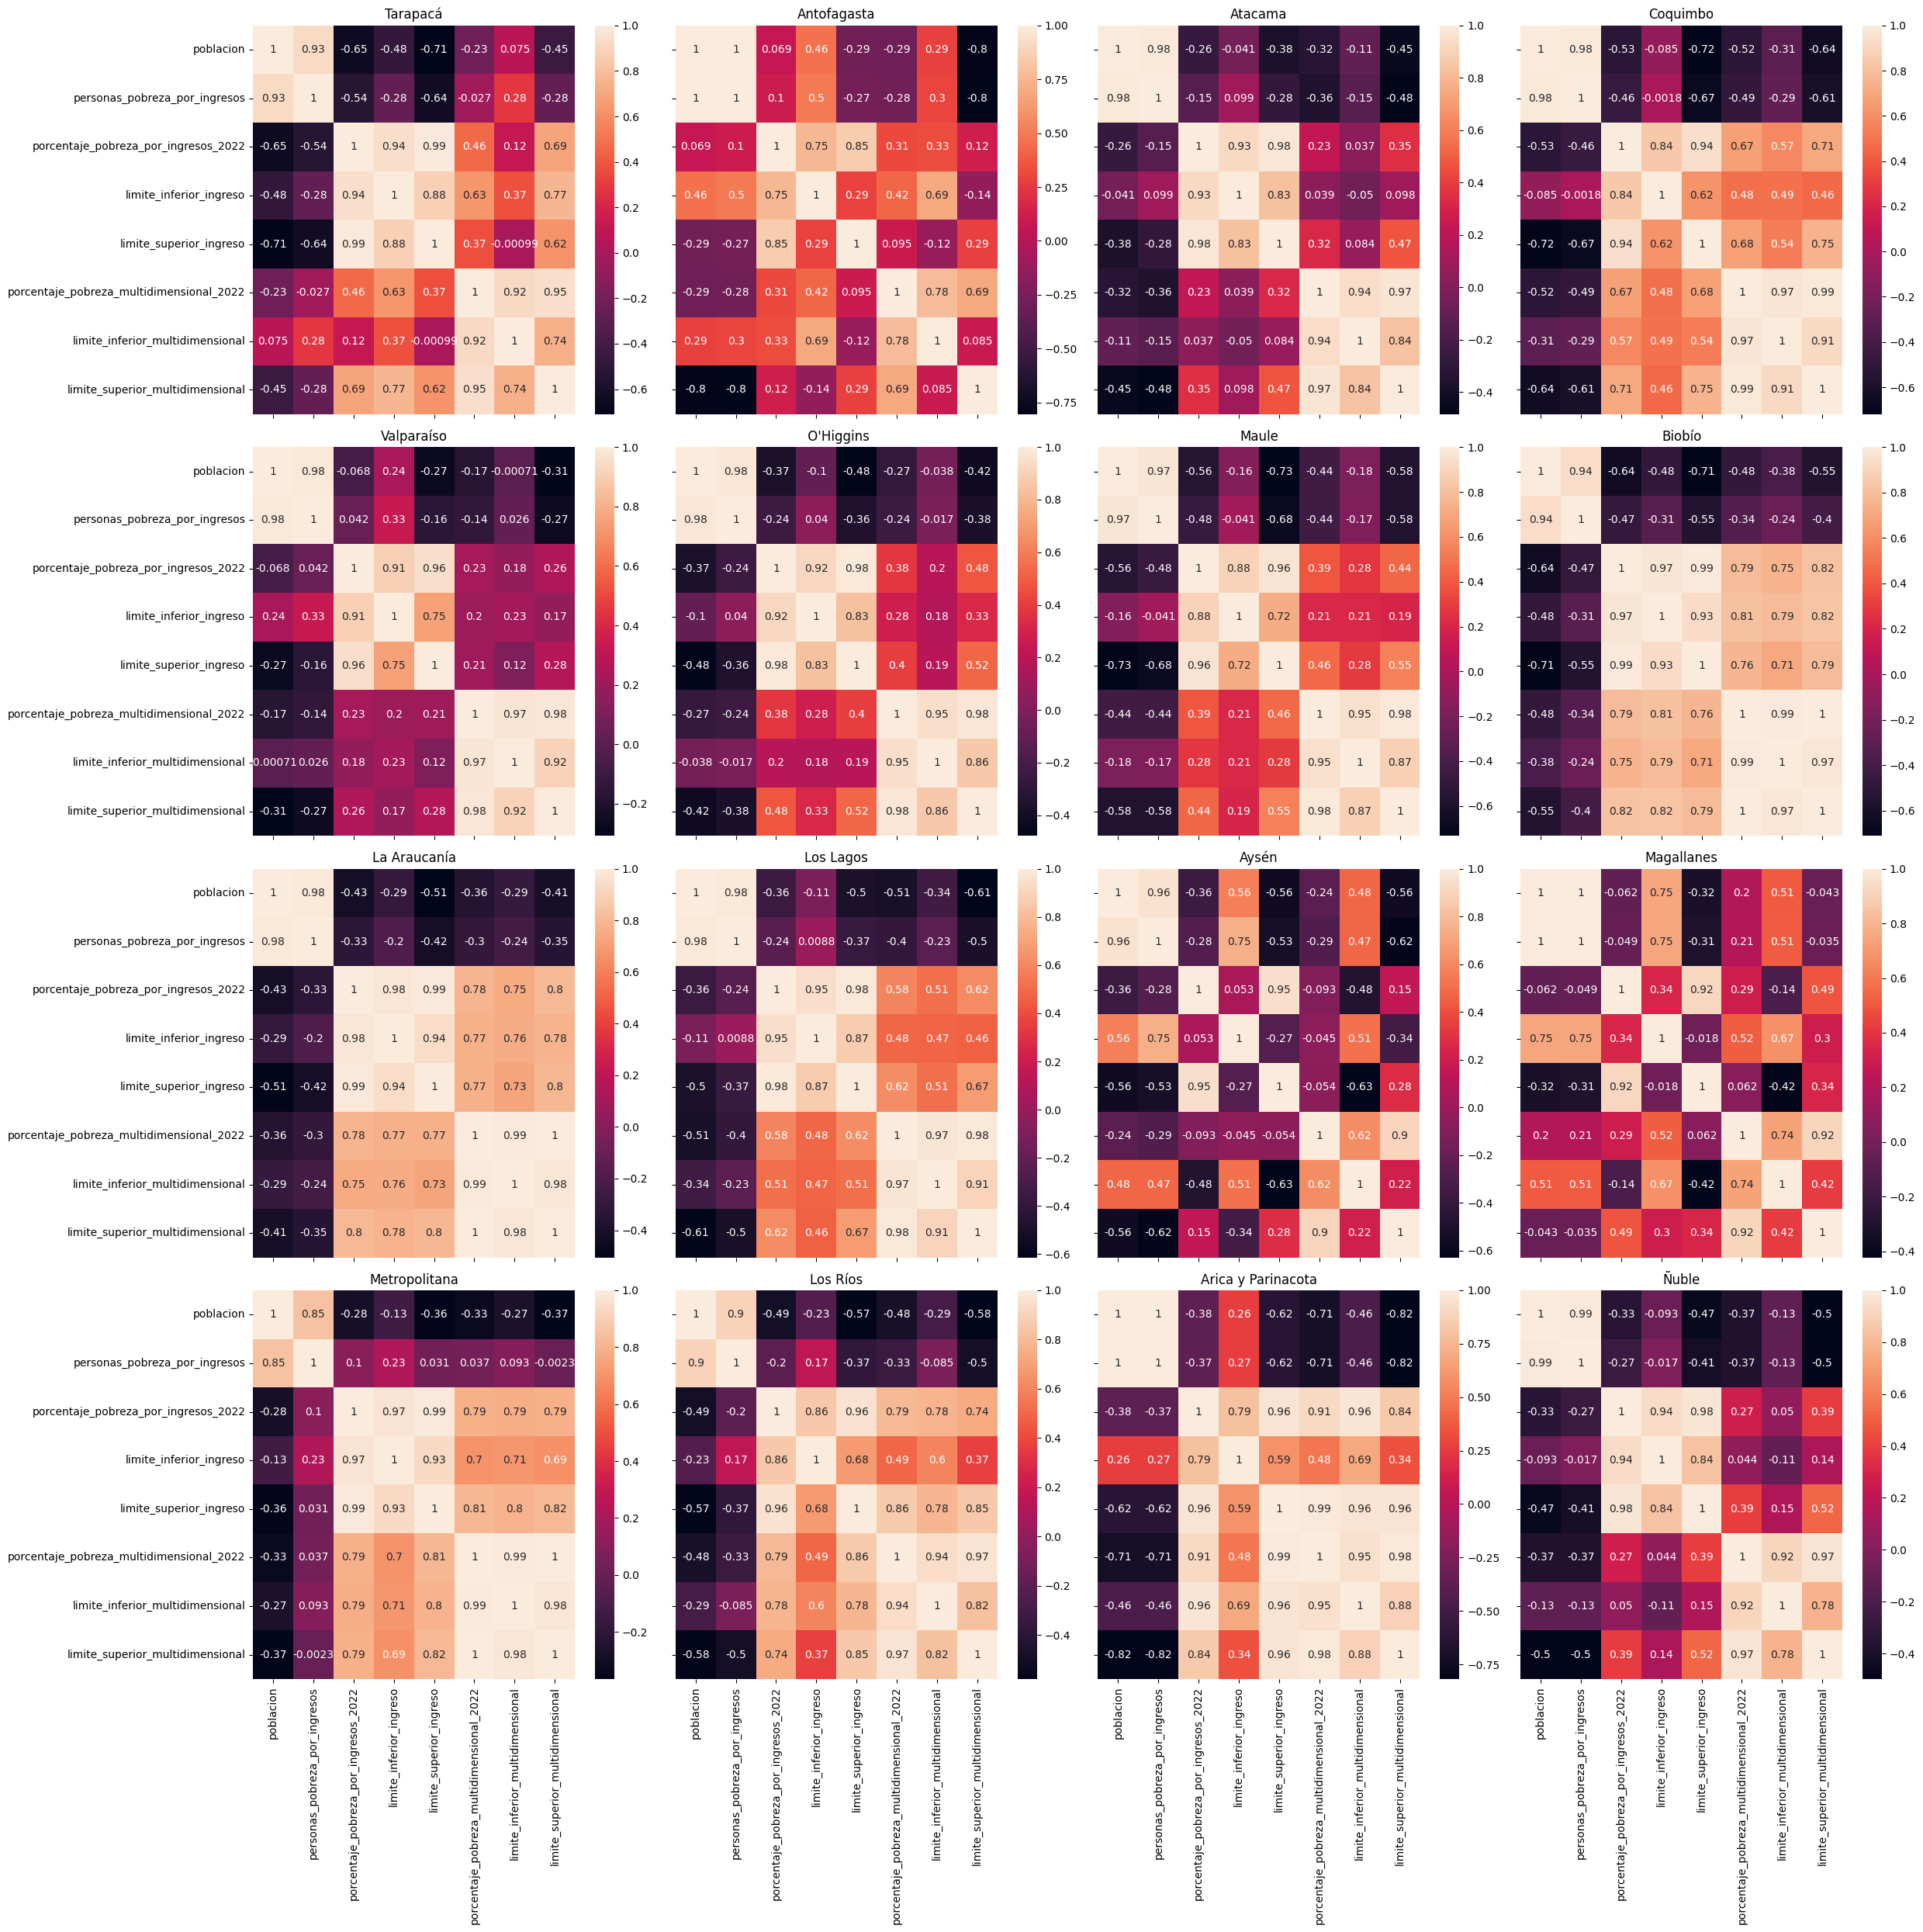

In [37]:
fig, ax = plt.subplots(4,4, figsize=(25,25), sharex=True, sharey=True)
k=0
for i in range(4):
    for j in range(4):
        df_merge_region = df_merge[df_merge['region']==df_merge.region.unique()[k]]
        sns.heatmap(df_merge_region.corr(numeric_only=True), annot=True, ax=ax[i,j])
        ax[i,j].set_title(df_merge.region.unique()[k])
        k+=1

plt.tight_layout()
plt.show()

#### Comparación de Distribuciones: Gráfico de Violines

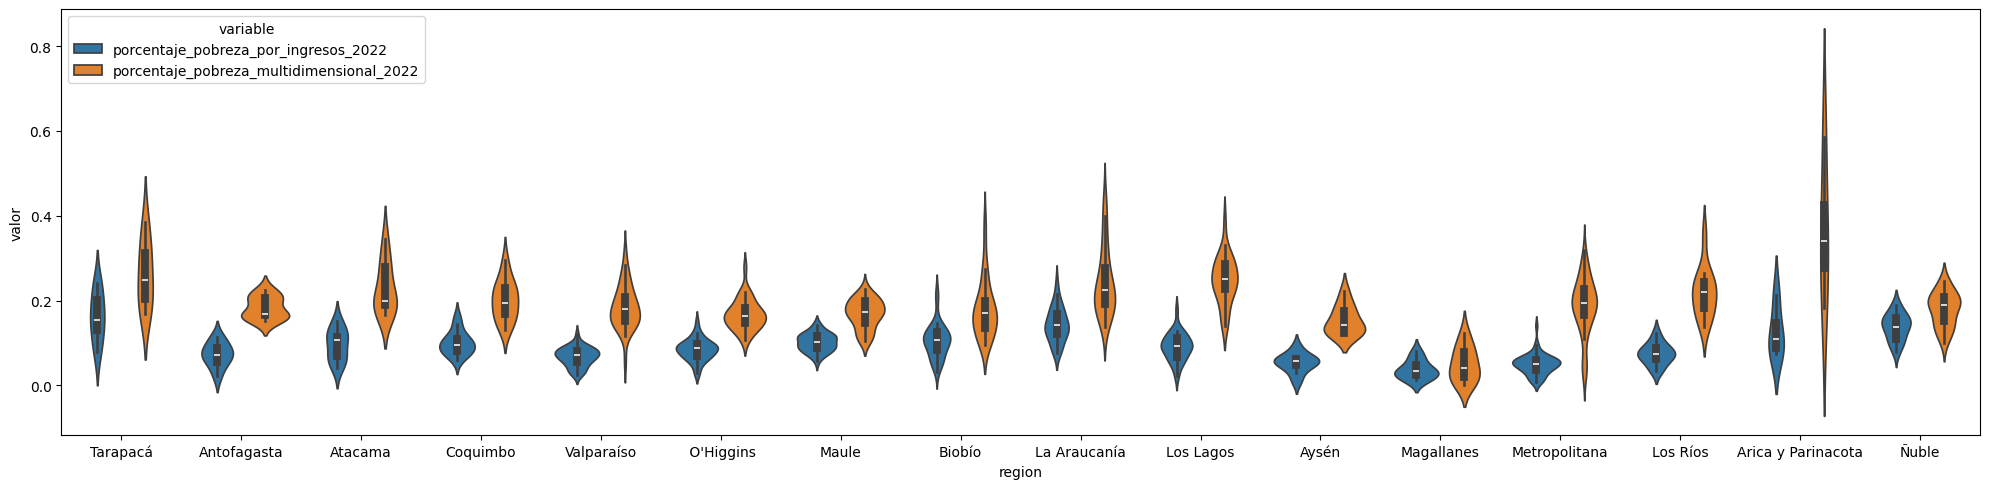

In [38]:
fig, ax = plt.subplots(1, figsize=(20,5))
df_merge_melt = pd.melt(df_merge, id_vars=['region'], value_vars=['porcentaje_pobreza_por_ingresos_2022', 'porcentaje_pobreza_multidimensional_2022'], var_name='variable', value_name='valor')
sns.violinplot(data=df_merge_melt, x='region', y='valor', hue='variable', ax=ax)
plt.tight_layout()
plt.show()

#### Comparación de la población por región (Swarm plot)

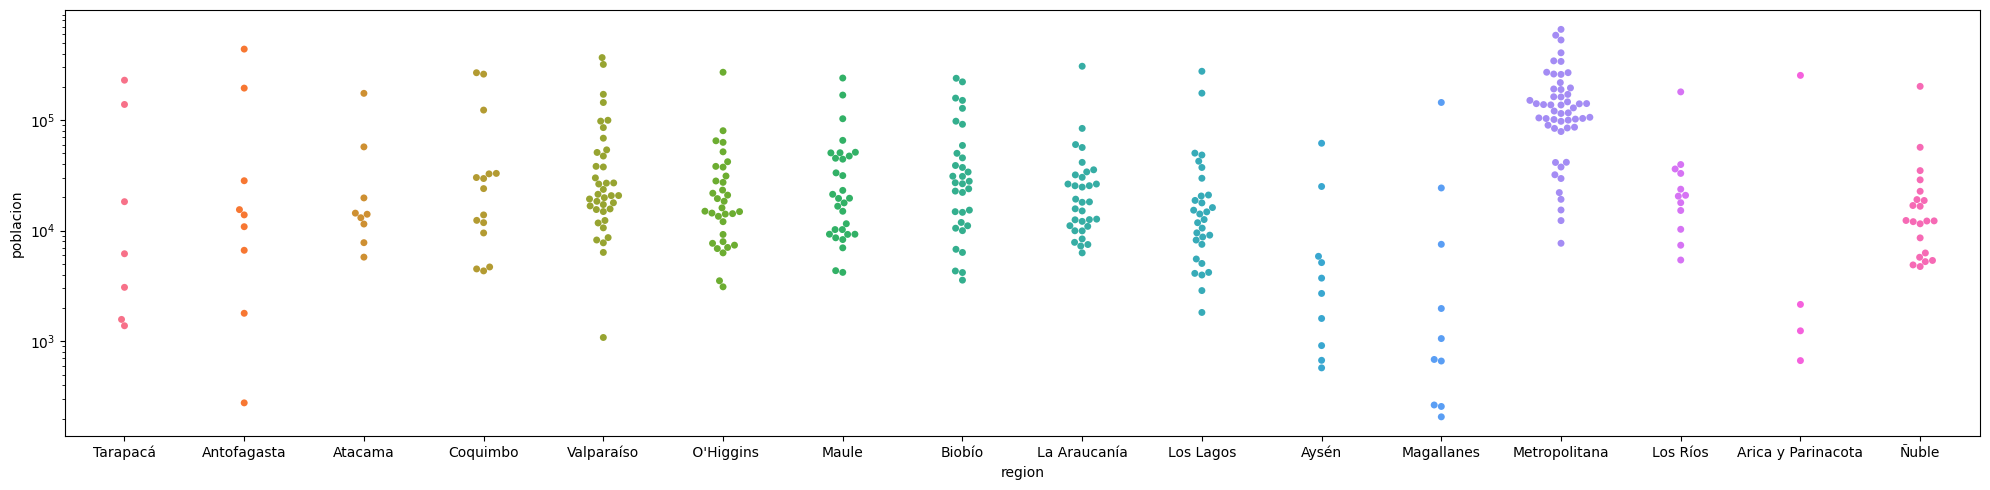

In [39]:
fig, ax = plt.subplots(1, figsize=(20,5))
sns.swarmplot(data=df_merge, x='region', y='poblacion', hue='region', ax=ax, log_scale=True)
plt.tight_layout()
plt.show()

In [40]:
# Info de + datyos comunales
# para revisar relaciones de densidad de poblacion, latitud y longitud
# estas ultimas estan corregidas repecto de santiago para ver si hay alguna relacion entre distancia a santiago
df_dist = pd.read_csv('https://raw.githubusercontent.com/altazor-1967/Comunas-de-Chile/refs/heads/master/Latitud%20-%20Longitud%20Chile.csv')
df_dist.columns = ['codigo', 'comuna', 'provincia', 'región', 'superficie', 'población', 'densidad', 'IDH 2005', 'latitud', 'longitud', 'latitud (Sexagesimal)', 'longitud (Sexagesimal)']
#df_dist = df_dist[['codigo', 'provincia', 'superficie', 'latitud', 'longitud']]
df_dist.superficie = df_dist.superficie.str.strip().str.replace(',','').astype(float)
df_merge_2 = df_merge.merge(df_dist, on='codigo')
df_merge_2['densidad_pob_2022'] = df_merge_2['poblacion'] / df_merge_2['superficie'].astype(float)

# latitud y longitud respecto de santiago (En revision)
#df_merge_2.latitud -= df_merge_2[df_merge_2['comuna']=='Santiago'].latitud.values[0]
#df_merge_2.longitud -= df_merge_2[df_merge_2['comuna']=='Santiago'].longitud.values[0]
df_merge_2.head(3)

codigo    region       comuna_x  poblacion  personas_pobreza_por_ingresos  \
0   1101  Tarapacá        Iquique   229674.0                        18122.0   
1   1107  Tarapacá  Alto Hospicio   138527.0                        21144.0   
2   1401  Tarapacá   Pozo Almonte    18290.0                         2805.0   

   porcentaje_pobreza_por_ingresos_2022  limite_inferior_ingreso  \
0                              0.078904                 0.064903   
1                              0.152634                 0.137397   
2                              0.153344                 0.115596   

   limite_superior_ingreso presencia_comuna_casen  \
0                 0.092905                     Sí   
1                 0.167872                     Sí   
2                 0.191092                     Sí   

              tipo_de_estimacion_sae  ...     región  superficie  población  \
0  Directa y Sintética (Fay-Herriot)  ...   Tarapacá      2242.1   191,468    
1  Directa y Sintética (Fay-Herriot)  ...   Tarapacá       572.9   108,375    
2  Directa y Sintética (Fay-Herriot)  ...   Tarapacá     13765.8    15,711    

  densidad IDH 2005  latitud  longitud latitud (Sexagesimal)  \
0     85.4    0.766 -20.2439  -70.1389         -20°14' 38''    
1    189.2      NaN -20.2569  -70.0219        -20°15'  25''    
2     1.14    0.722 -20.2908  -69.6958         -20°17' 27''    

  longitud (Sexagesimal)  densidad_pob_2022  
0          -70°8'  20''          102.437001  
1           -70°1' 19''          241.799616  
2          -69°41' 45''            1.328655  

[3 rows x 25 columns]

<Figure size 1000x1000 with 0 Axes>

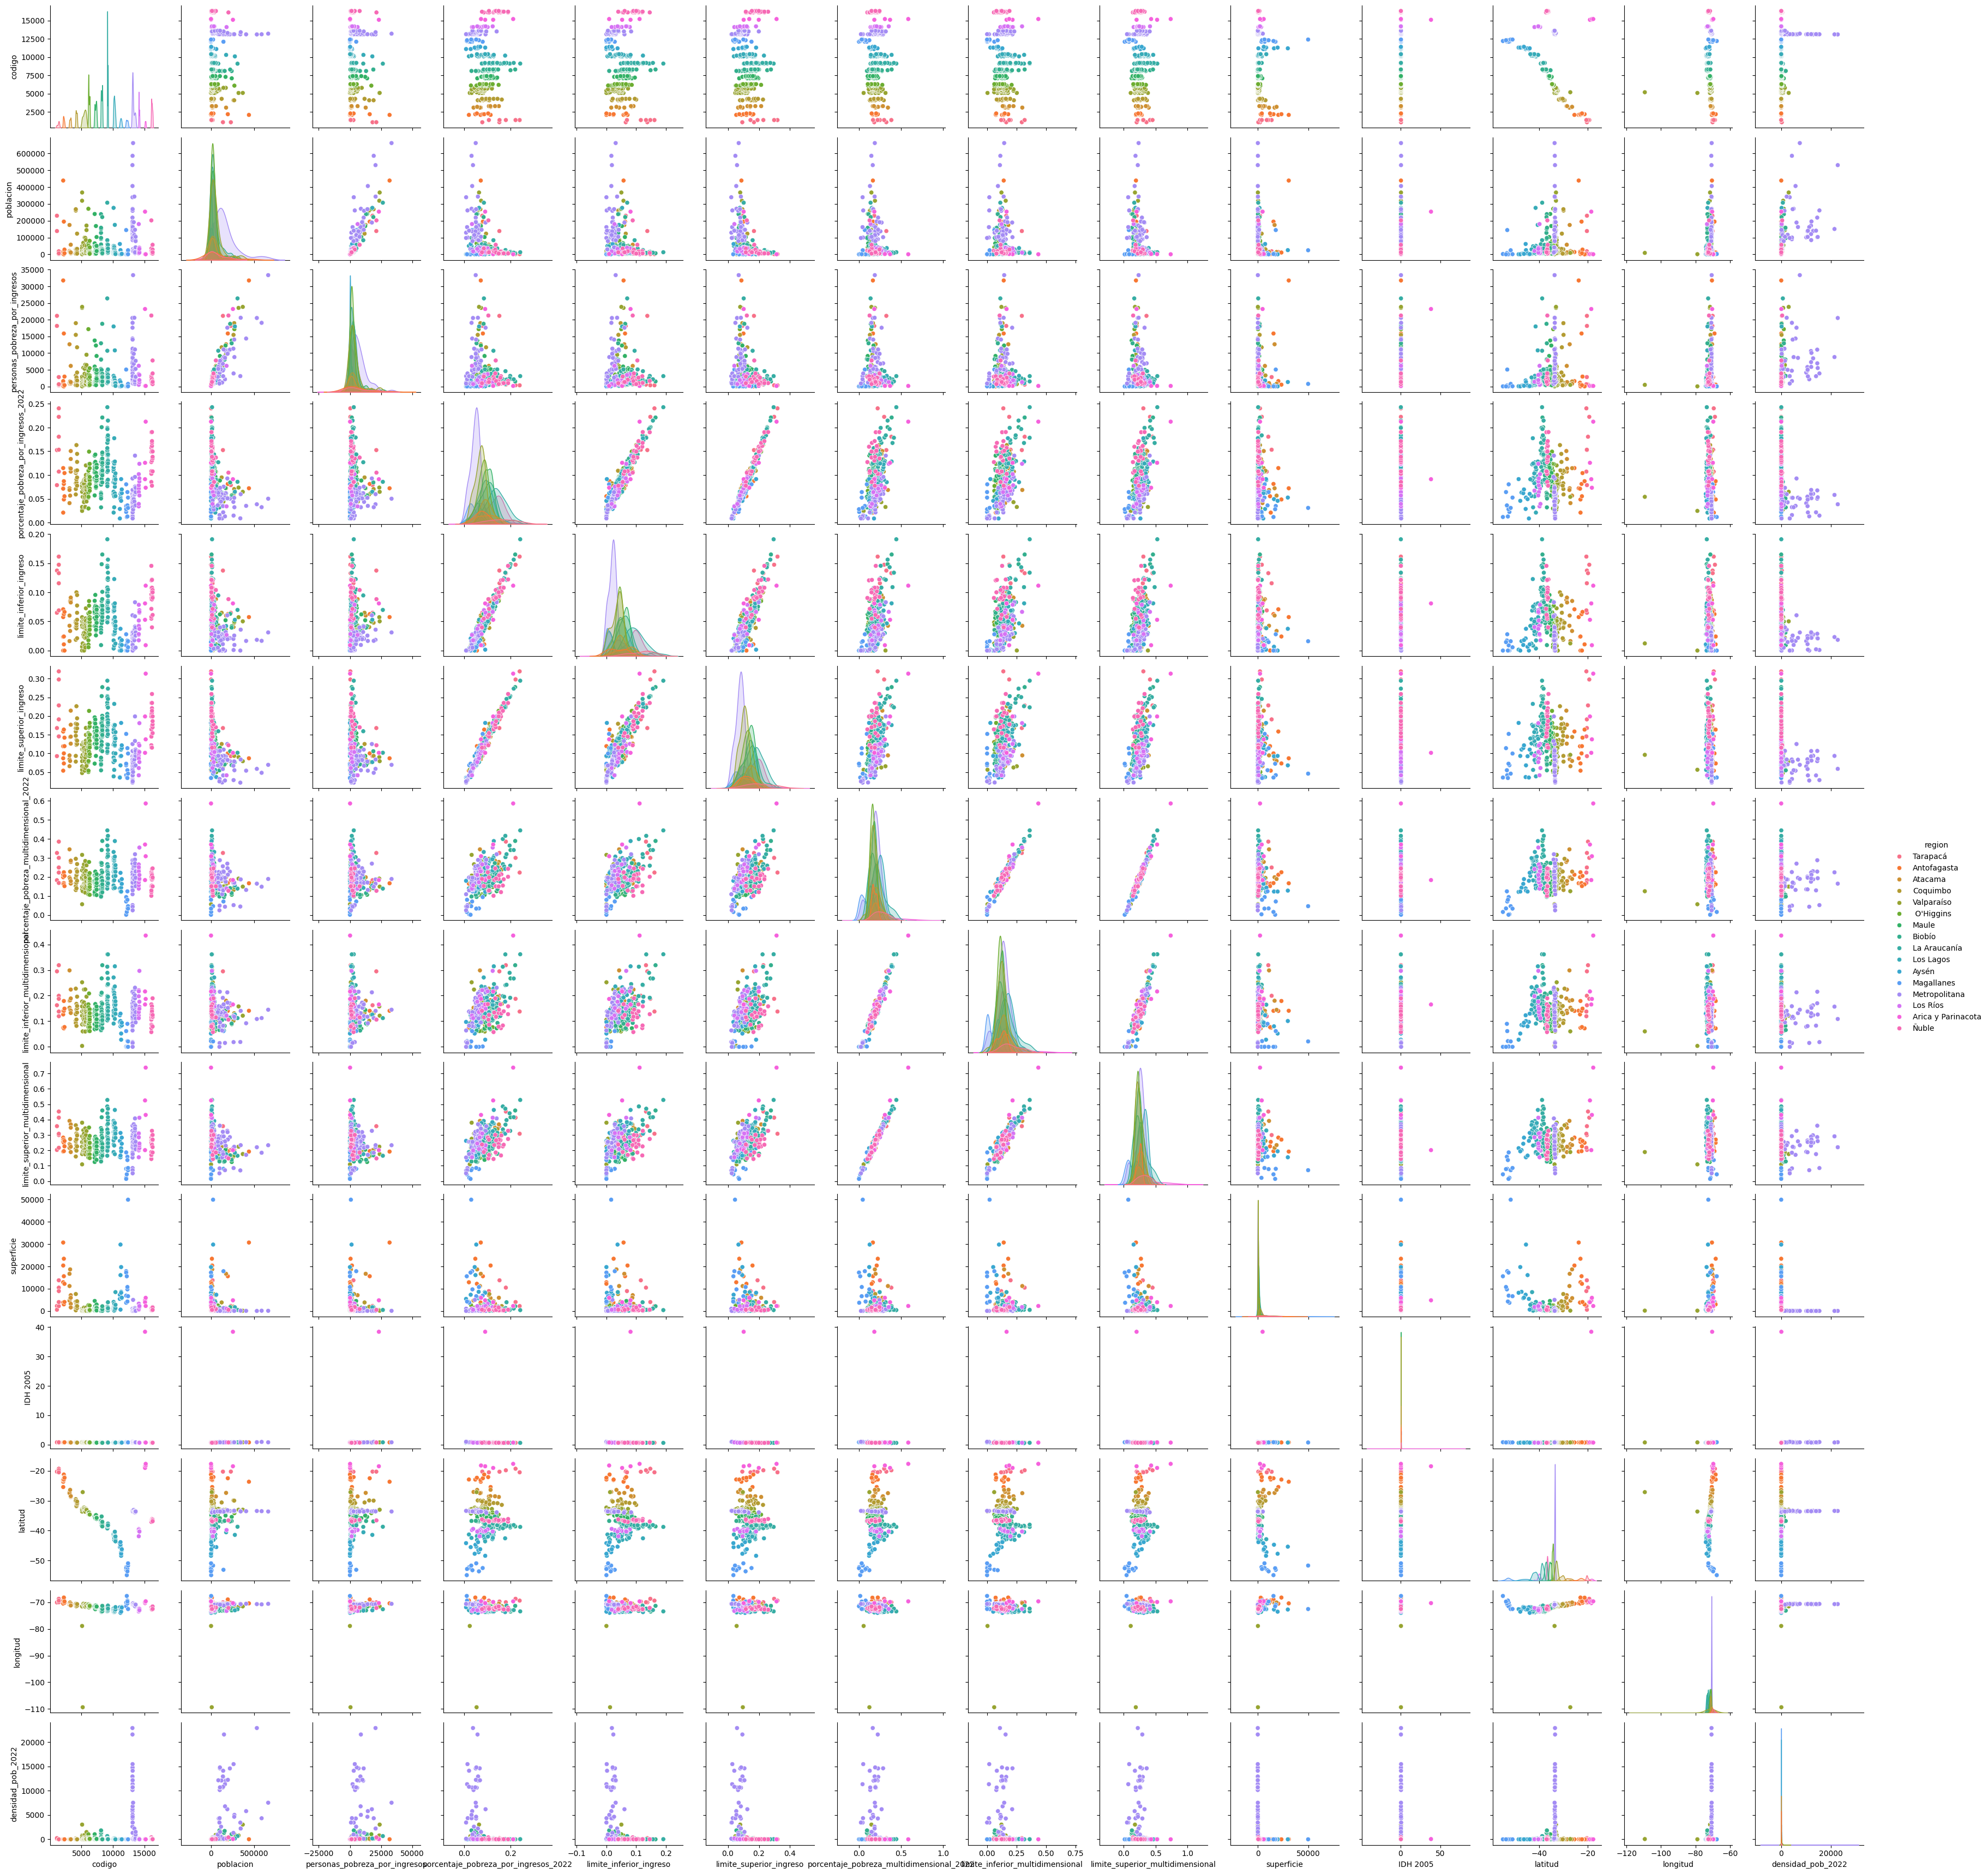

In [41]:
plt.figure(figsize=(10,10))
sns.pairplot(df_merge_2, hue='region')

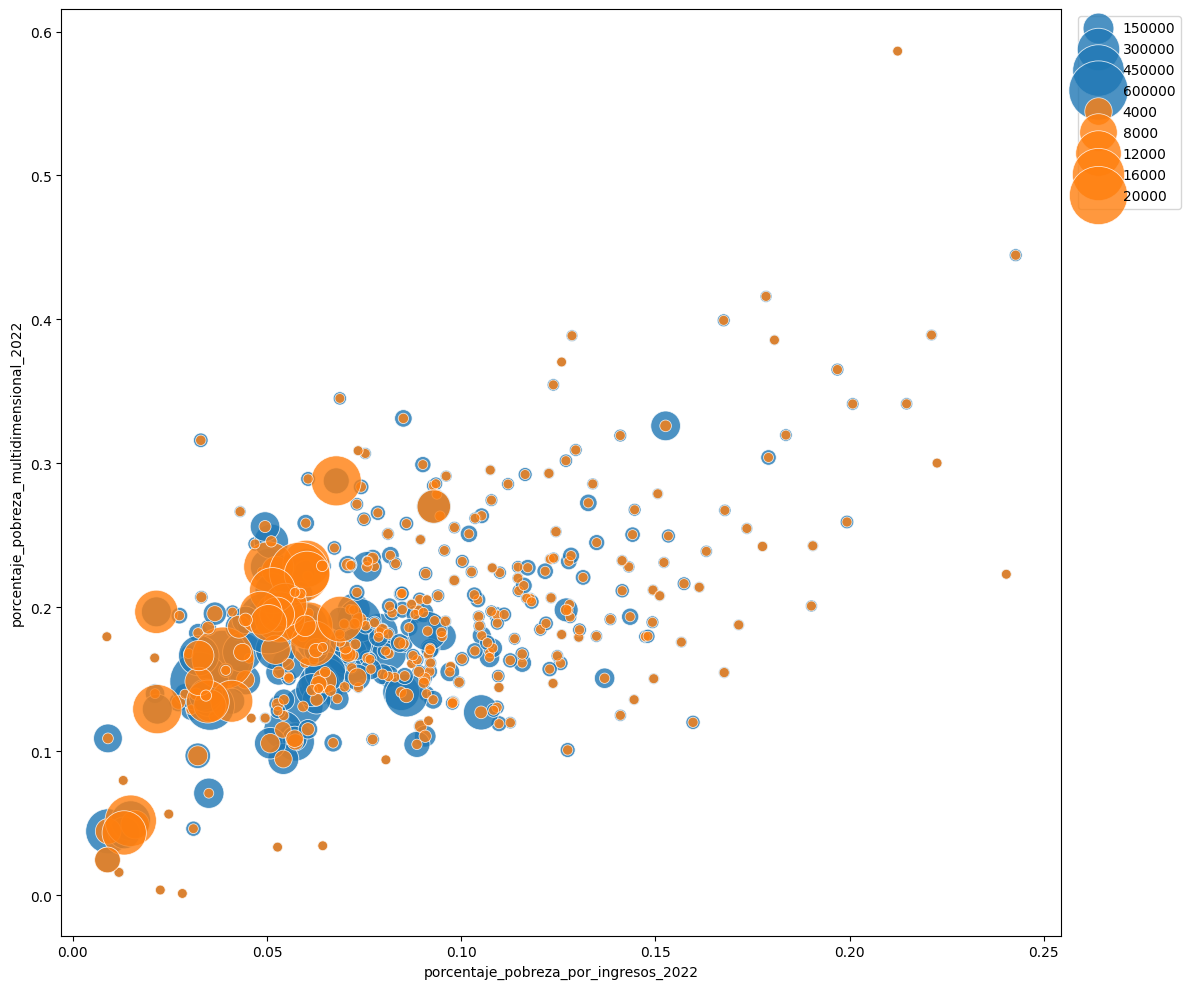

In [42]:
fig, ax = plt.subplots(1, figsize=(12,10))

sns.scatterplot(data=df_merge_2, x='porcentaje_pobreza_por_ingresos_2022', y='porcentaje_pobreza_multidimensional_2022', size='poblacion', sizes=(50, 2000), alpha=0.8, ax=ax)
sns.scatterplot(data=df_merge_2, x='porcentaje_pobreza_por_ingresos_2022', y='porcentaje_pobreza_multidimensional_2022', size='densidad_pob_2022', sizes=(50, 2000), alpha=0.8, ax=ax)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()

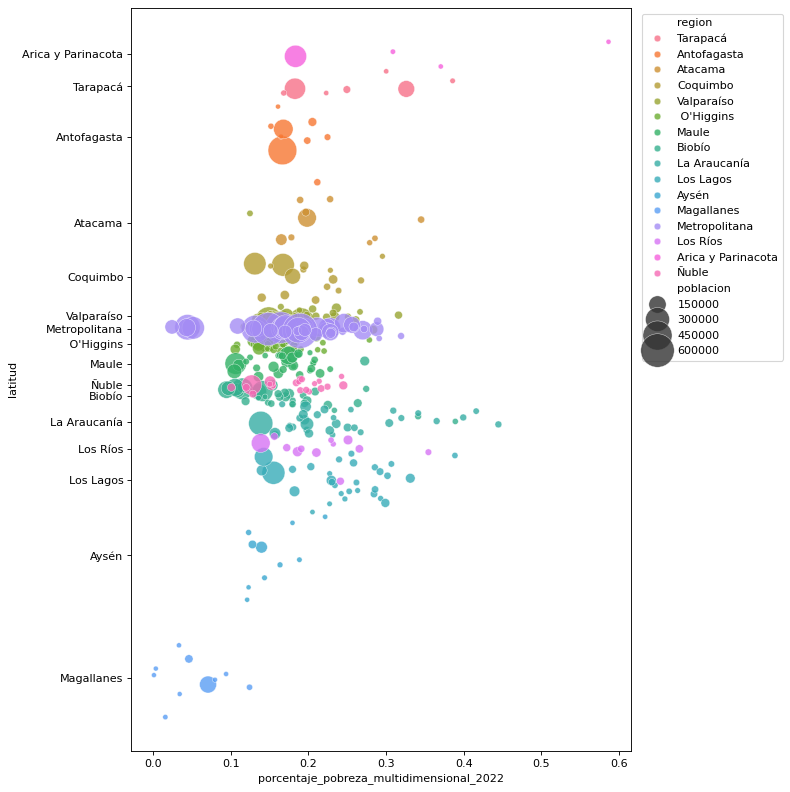

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10), dpi=80)
diamond_marker = "o"#((0, -0.8), (1.5, 0), (0, 0.8), (-1.5, 0))

regiones_sort = {'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, " O'Higgins": 8, 
                'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16}
df_merge_2['num_region'] = [17-regiones_sort[r] for r in df_merge_2.region]

sns.scatterplot(data=df_merge_2, 
                x='porcentaje_pobreza_multidimensional_2022', y='latitud', size='poblacion', sizes=(20, 1000), marker=diamond_marker, alpha=0.8, ax=ax, hue='region')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

ax.set_yticks(df_merge_2.groupby('num_region')['latitud'].mean(numeric_only=True).sort_values(ascending=False))
ax.set_yticklabels([r for r in regiones_sort.keys()])
plt.tight_layout()
plt.show()

In [44]:
#Datos del 2020
df_3 = get_clean_data(file='./data/Estimaciones_de_Tasa_de_Pobreza_por_Ingresos_por_Comunas_2020_revisada2022_09.xlsx', get_rows=[2, 345])
df_3 = df_3[['codigo', 'porcentaje_de_personas_en_situacion_de_pobreza_por_ingresos_2020']]
df_3 = df_3.rename(columns={'porcentaje_de_personas_en_situacion_de_pobreza_por_ingresos_2020': 'porcentaje_pobreza_por_ingresos_2020'})
df_merge_3 = df_merge_2.merge(df_3, on='codigo')
df_merge_3['diff_porcentaje_pobreza_por_ingresos'] = -df_merge_3['porcentaje_pobreza_por_ingresos_2022'] + df_merge_3['porcentaje_pobreza_por_ingresos_2020']
df_merge_3['porcentaje_pobreza_por_ingresos_sube'] = df_merge_3['diff_porcentaje_pobreza_por_ingresos']>0

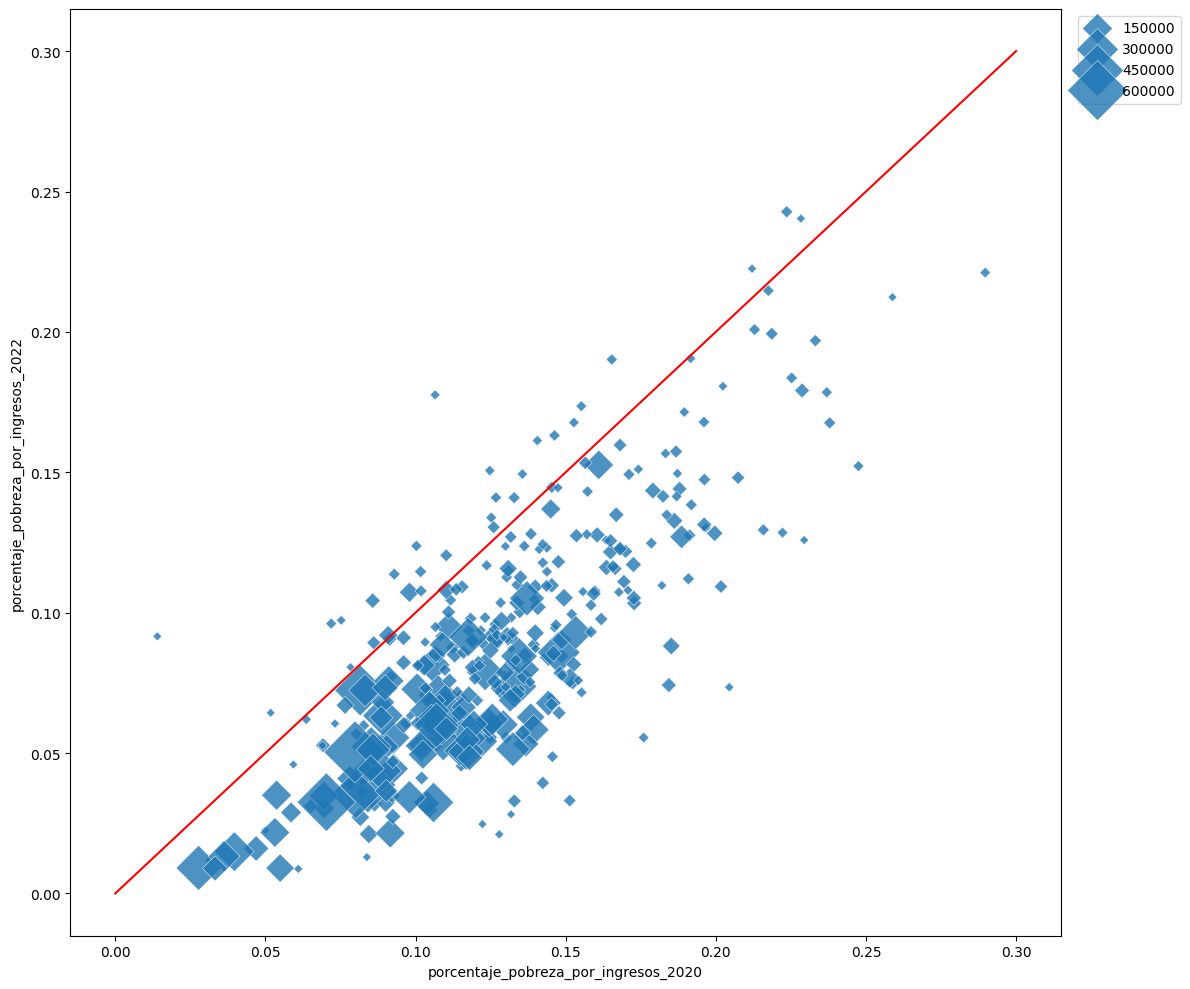

In [45]:
# Las comunas con mayor poblacion (y con mayor densidad de poblacion) disminuyeron su porcentaje de pobreza por ingreso
fig, ax = plt.subplots(1, figsize=(12,10))

sns.scatterplot(data=df_merge_3, x='porcentaje_pobreza_por_ingresos_2020', y='porcentaje_pobreza_por_ingresos_2022', alpha=0.8, ax=ax, size='poblacion', sizes=(20, 1000), marker='D')
ax.plot([0, 0.3], [0, 0.3], color='r')

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

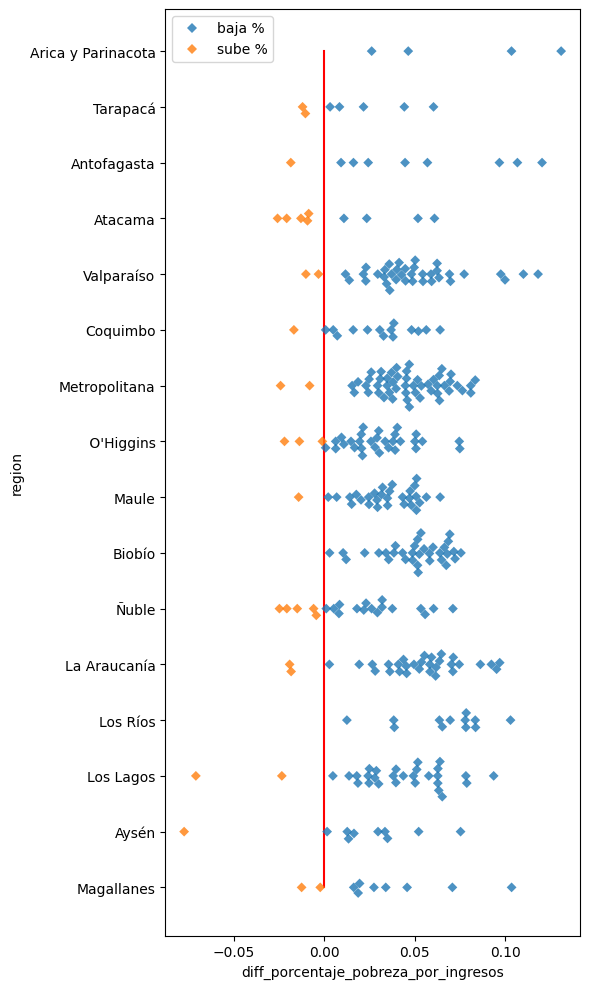

In [46]:
# Otra vista de los mismo, la mayoria mejoró su indice de pobreza por ingreso
fig, ax = plt.subplots(1, figsize=(6,10))

sns.swarmplot(data=df_merge_3.sort_values('latitud', ascending=False), y='region', x='diff_porcentaje_pobreza_por_ingresos', 
                alpha=0.8, ax=ax, marker='D',
                hue=['baja %' if i>0 else 'sube %' for i in df_merge_3.sort_values('latitud', ascending=False)['diff_porcentaje_pobreza_por_ingresos']])
ax.plot([0, 0], [0, 15], color='r')

plt.tight_layout()
plt.show()

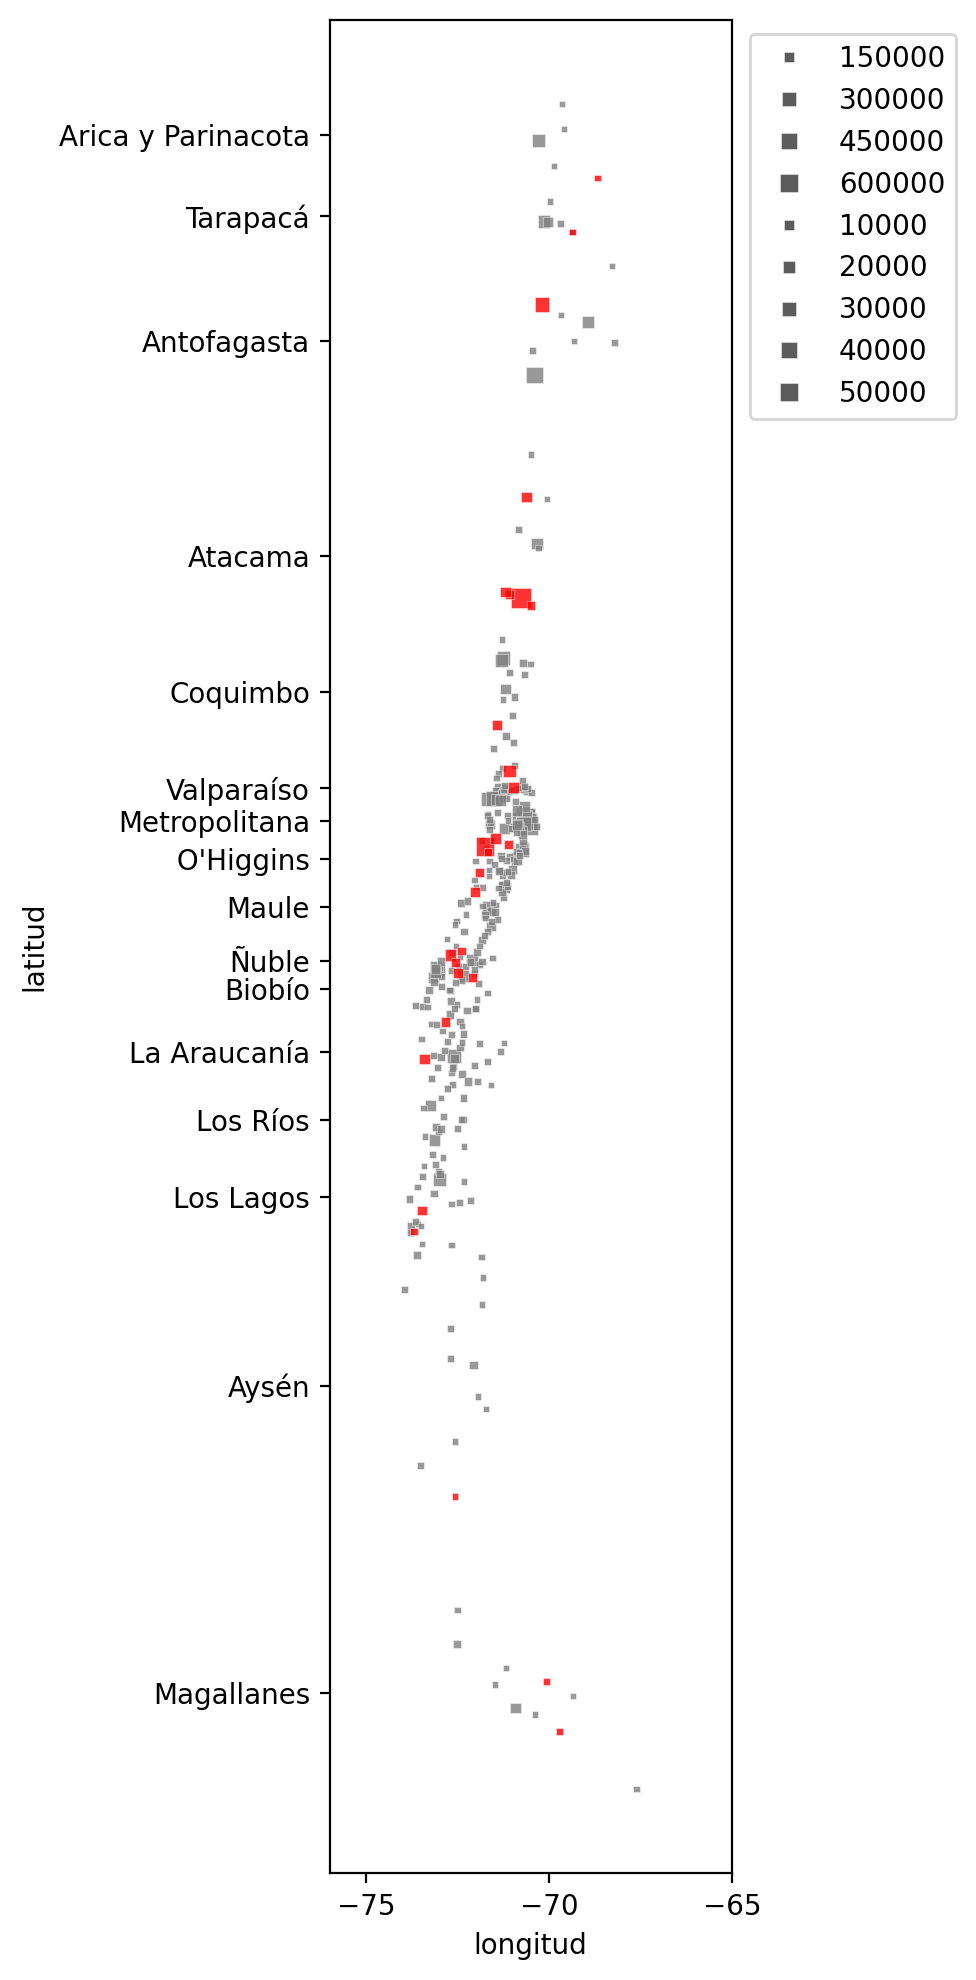

In [47]:
# La subida o baja en el indice no parece tener alguna relación con la distribución geográfica
fig, ax = plt.subplots(1, figsize=(5,10), dpi=200)
diamond_marker = "s"#((0, -0.8), (1.5, 0), (0, 0.8), (-1.5, 0))
df_m_3 = df_merge_3[df_merge_3['diff_porcentaje_pobreza_por_ingresos']>0]
sns.scatterplot(data=df_m_3, 
                x='longitud', y='latitud', size='poblacion', sizes=(5, 50), marker=diamond_marker, alpha=0.8, ax=ax, c='gray')
df_m_3 = df_merge_3[df_merge_3['diff_porcentaje_pobreza_por_ingresos']<=0]
sns.scatterplot(data=df_m_3, 
                x='longitud', y='latitud', size='poblacion', sizes=(5, 50), marker=diamond_marker, alpha=0.8, ax=ax, c='r')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

ax.set_yticks(df_merge_3.groupby('num_region')['latitud'].mean(numeric_only=True).sort_values(ascending=False))
ax.set_yticklabels([r for r in regiones_sort.keys()])
ax.set_xlim([-76,-65])
plt.tight_layout()
plt.show()

<Axes: ylabel='region'>

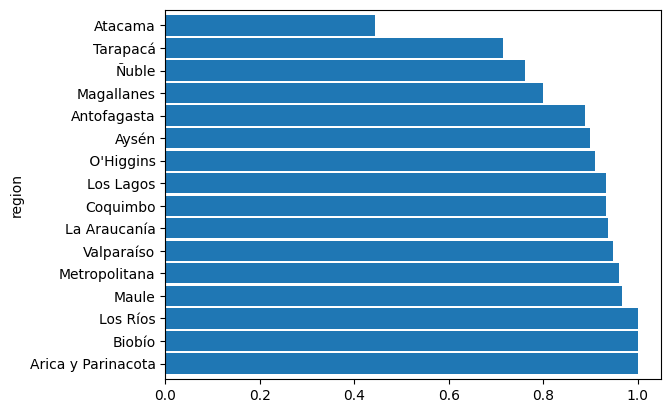

In [48]:
df_merge_3.groupby('region')['porcentaje_pobreza_por_ingresos_sube'].mean().sort_values(ascending=False).plot.barh(width=0.9)

<Axes: xlabel='poblacion', ylabel='Density'>

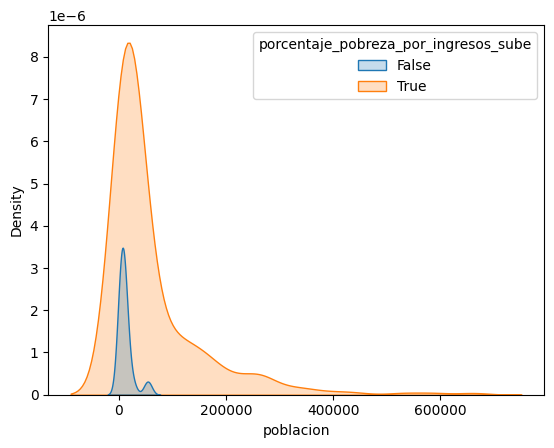

In [49]:
sns.kdeplot(x=df_merge_3['poblacion'], hue=df_merge_3['porcentaje_pobreza_por_ingresos_sube'], fill=True)